<a href="https://colab.research.google.com/github/RadivanHanivansyah/ID-Stopwords/blob/master/test_oopipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
!pip install Sastrawi
import nltk
import numpy as np
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from flask import Flask, request

nltk.download('punkt')
nltk.download('stopwords')
import gensim
from gensim.models import Word2Vec
from keras import models
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow import keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
class preprocessing:
    def __init__(self, teks):
        self.teks = teks
        self.list = teks.split()
        self.hasil_casefolding = []
        self.hasil_punctuation = []
        self.hasil_ubahujung = []
        self.hasil_hapusalay = []
        self.hasil_tokenisasi = []
        self.hasil_stopword = []
        self.hasil_stopwordclean = []
        self.hasil_stemming = []
        self.hasil = []
        self.hasil_tokenizer = []
    def case_folding(self):
      for kalimat in self.list:
        hasil = kalimat.lower()
        self.hasil_casefolding.append(hasil)
    def ubahujung(self):
        for kalimat in self.hasil_casefolding:
          for kata in kalimat:
            ujung = kata[len(kata)-1]
            if kata == str(2):
                kalimat = kalimat.replace(kata, kata.replace(ujung, ""))
          self.hasil_ubahujung.append(kalimat)
    def punctuation(self):
      for kalimat in self.hasil_ubahujung:
        kalimat = re.sub('@[^\s]+','',kalimat) #remove @username
        kalimat = re.sub("#[A-Za-z0-9_]+",'', kalimat) #remove hastag
        kalimat = re.sub(r'[^\w]', ' ', kalimat) #remove special character&emoticon
        kalimat= re.sub(r"[0-9.]+", "", kalimat) #remove all numeric, decimal, kurung
        kalimat = re.sub(r"\s+", " ", kalimat) #remove redundant space
        kalimat = re.sub(r'(?m)^[ \t]*$\n?', '', kalimat) #remove empty string
        self.hasil_punctuation.append(kalimat)
      self.hasil_punctuation =  [x for x in self.hasil_punctuation if x != '']
    def hapus_alay(self):
        data_kamus = pd.read_csv('/content/kamus alay.csv')
        data_kamus = dict(zip(data_kamus['slang'], data_kamus['formal']))
        for kalimat in self.hasil_punctuation:
          kalimat = kalimat.split(' ')
          hasil = []  
          for kata in kalimat:
            if kata in data_kamus:
                hasil .append(data_kamus[kata])
            else:
                hasil .append(kata)
          kalimatbaru = ' '.join(hasil)
          self.hasil_hapusalay.append(kalimatbaru)
    def tokenize(self):
      for kalimat in self.hasil_hapusalay:
        kalimat = nltk.tokenize.word_tokenize(kalimat)
        self.hasil_tokenisasi.append(kalimat)
    def stopword(self):
        list_stopword = stopwords.words('indonesian')
        list_stopword.extend(['lha', 'loh', 'sih', 'kh', 'khan', 'la' , 'iki', 'gw,' 'wx', 'mbuhala', 'loe', 'ini', 'yah', 'eh', 'lo', 'dah', 'ye', 'wkwok', 'wk', 'dengn', 'cikini', 'mk',
        'koq', 'hehehe', 'ha', 'hussttt', 'amp' ,'hahahahahaha','kok', 'wkwkwkkwkw', 'si', 'save, palestina', 'haaaadeeeeeuuuuuuhhhh', 'upss','wkwks', 'an',  'ما شاء الله'])
        with open('/content/stopword.txt') as f:
            stopwordsbaru = f.read().splitlines()
        with open('/content/stopword twitter.txt') as f:
            stopwordstweet = f.read().splitlines()
        stopword = list_stopword + stopwordsbaru + stopwordstweet
        exception_words = ['tidak', 'belum','enggak','jangan']
        for kalimat in self.hasil_tokenisasi:
          hasil3 = []
          for kata in kalimat:
            if kata not in list_stopword or kata in exception_words:
              hasil3.append(kata)
          kalimatbaru = ' '.join(hasil3)
          self.hasil_stopword.append(kalimatbaru)
        self.hasil_stopwordclean= [item for item in self.hasil_stopword if item != '']
    def stemming(self):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        for kalimat in self.hasil_stopwordclean:
          kalimat = kalimat.split(' ')  
          hasil3 = []
          for kata in kalimat:
            hasil3.append(stemmer.stem(kata))
          kalimatbaru = ' '.join(hasil3)
          self.hasil_stemming.append(kalimatbaru)
    def tokenizer(self):
        tokenizer= Tokenizer()
        sentence = " ".join(self.hasil_stemming)
        hasil=[sentence]
        tokenizer.fit_on_texts(hasil)
        self.hasil_tokenizer = pad_sequences(tokenizer.texts_to_sequences(hasil), maxlen=50, padding='post')

In [ ]:
class preprocessingdata(preprocessing):
    def __init__(self,data):
        self.data = data
        self.list = data.tolist()
        self.hasil_casefolding = []
        self.hasil_ubahujung=[]
        self.hasil_punctuation = []
        self.hasil_hapusalay = []
        self.hasil_tokenisasi = []
        self.hasil_stopword = []
        self.hasil_stopwordclean = []
        self.hasil_stemming = []
        self.hasil_tokenizer = None
    def case_folding(self):
      super().case_folding()
    def ubahujung(self):
      super().ubahujung()
    def punctuation(self):
      super().punctuation()
    def hapus_alay(self):
      super().hapus_alay()
    def tokenize(self):
        super().tokenize()
    def stopword(self):
        super().stopword()
    def stemming(self):
        super().stemming()
    def tokenizer(self):
        tokenizer= Tokenizer()
        tokenizer.fit_on_texts(self.hasil_stemming)
        self.hasil_tokenizer = pad_sequences(tokenizer.texts_to_sequences(self.hasil_stemming), maxlen=50, padding='post')

In [ ]:
# teks = 		'..mengenai KK bersyarat. Ini diskriminatif, dholim, lagi tidak adil. Tapi, para pembesar ini semuanya diam, seperti tidak peduli. Kemana slogan Pancasila yang setiap hari Presiden Joko Widodo, Mahfud MD, serta Anies Baswedan, biasa dinyanyikan ?. Celakanya, sampai saat..'
teks='@AnakLolina2 Disitulah hebat nya Anies bisa menyesuaikan diri, bisa jadi pendeta, bisa jadi ustadz, bisa jadi orang Sunda, bisa jadi orang Jawa, saking bernapsu jadi presiden, pd hal nabi melarang memberikan jabatan kpd orang yg meminta nya. inti nya jangan pilih Anies.'
test1 = preprocessing(teks)
test1.case_folding()
test1.ubahujung()
test1.punctuation()
test1.hapus_alay()
test1.tokenize()
test1.stopword()
test1.stemming()
test1.tokenizer()
# test1.hasil_stemming
# # print('hello word')

In [ ]:
test1.hasil_tokenizer

array([[ 4,  5,  1,  3,  6,  7,  8,  2,  9,  2, 10, 11, 12, 13, 14, 15,
        16,  2,  1, 17,  1, 18, 19,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]], dtype=int32)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
data = pd.read_csv('/content/test kalimat.csv')
y = data['Sentimen']
x = data['tweets']

In [ ]:
test = preprocessingdata(x)
test.case_folding()
test.ubahujung()
test.punctuation()
test.hapus_alay()
test.tokenize()
test.stopword()
test.stemming()
test.tokenizer()

In [ ]:
model = load_model('/content/modelLSTMBenar.h5')
predict = (model.predict(test.hasil_tokenizer)> 0.5).astype("int32")
# label = (np.argmax(predict)> 0.5).astype("int32")
# label
predict

4/4 [==============================] - 1s 9ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.18      0.06      0.09        32
           1       0.69      0.88      0.78        77

    accuracy                           0.64       109
   macro avg       0.44      0.47      0.44       109
weighted avg       0.54      0.64      0.58       109



In [ ]:
import os
import pandas as pd
datatest = pd.read_csv('/content/test kalimat.csv')
save_location = os.path.join('/content','test kalimat.csv')
x = pd.read_csv(save_location)
x

,tweets,Sentimen,Jumlah kata
0,@Syaiful18532221 @Rdicks10 @maspiyuaja Di band...,1,23
1,@Thalomoan1 Pdt. Anies Baswedan Sth.,0,5
2,@musniumar Musni umar calon menteri pendidikan...,1,12
3,"@marlina_idha Mantap pak,\n\nSaya dukung bapak...",1,27
4,@msaid_didu Yg menghormati kedatangan Miyabi p...,0,33
...,...,...,...
104,@KING__VADUKA Apa yang akan terjadi jika Deni ...,0,20
105,@aniesbaswedan @EIB @DKIJakarta @mrtjakarta @p...,1,25
106,@aniesbaswedan @PT_Transjakarta @BloombergNEF ...,1,19
107,@tempodotco Sungguh berita yang sungguh... Sal...,1,10


In [ ]:
import pandas as pd
data = pd.read_csv('/content/test kalimat.csv')
x = data['tweets']
x

0      @Syaiful18532221 @Rdicks10 @maspiyuaja Di band...
1                   @Thalomoan1 Pdt. Anies Baswedan Sth.
2      @musniumar Musni umar calon menteri pendidikan...
3      @marlina_idha Mantap pak,\n\nSaya dukung bapak...
4      @msaid_didu Yg menghormati kedatangan Miyabi p...
                             ...                        
104    @KING__VADUKA Apa yang akan terjadi jika Deni ...
105    @aniesbaswedan @EIB @DKIJakarta @mrtjakarta @p...
106    @aniesbaswedan @PT_Transjakarta @BloombergNEF ...
107    @tempodotco Sungguh berita yang sungguh... Sal...
108    @Fahrihamzah Dah dipaksa pengadilan suruh nger...
Name: tweets, Length: 109, dtype: object

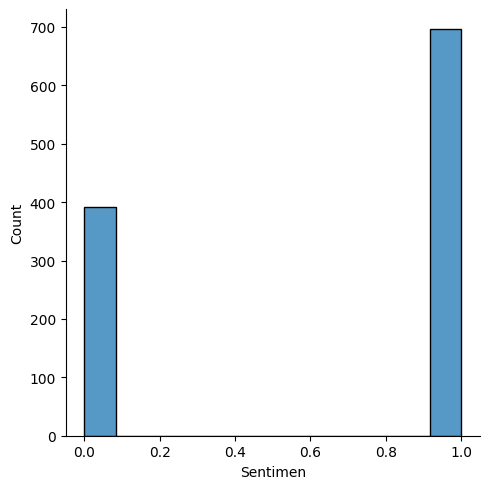

In [ ]:
import seaborn as sns
sns.displot(data=data1, x='Sentimen')

In [ ]:
yo = data1[data1.tweets.str.contains('jangan',case=False)]
yo

,user,tweets
48,Lee Tjong Seen,@ajenar @aniesbaswedan @GeiszChalifah @tatakuj...
57,BERJIHAD MENJAGA NKRI. Indonesia Maju & Sejaht...,"@alextham878 Mohon Pak @erickthohir, jangan di..."
70,Muradi Djarkasih,@AnakLolina2 Disitulah hebat nya Anies bisa me...
82,@bayu_herlambang,@AndiSinulingga Jangan bandingkan kerja nyata ...
139,Rico Mahendra,@AnyameGanjar @Sobat_Anies Sebenarnya gaada ma...
148,Riyanti,@arinmuhammad @SyedAkramin Ambil saja gubernur...
169,"🇲🇨BORAMAE🇲🇨 보라매,",@binyobapontar_ @UAS_AbdulSomad @musniumar Lah...
186,NKRI 🇮🇩,@Candraasmara85 Kalau saya yg dapt dana hibah ...
282,2024 64nt1 Pr351d3n,@EdiMahaMG Menggunakan pawang hujan jelas-jela...
299,rajomedan,@esasuryo @Mdy_Asmara1701 jangan marah yee klo...


In [ ]:
x = data1[(data1.tweets.str.contains('tidak',case=False)) &(data1['Sentimen']==1)].index
x

Int64Index([  33,  156,  166,  216,  254,  256,  261,  272,  326,  330,  350,
             371,  420,  424,  461,  471,  482,  486,  516,  521,  551,  569,
             573,  587,  613,  678,  719,  720,  791,  858,  923, 1013, 1037,
            1039, 1058, 1072],
           dtype='int64')

In [ ]:
data1.drop(x,inplace=True)

In [ ]:
data1

,user,tweets,Sentimen
0,VDVC News,"""Indo Survei sendiri menemukan, dalam simulasi...",1
1,Toto Kartarahardja,"""Saya harus selamat, masih banyak koruptor yan...",1
2,Parahyanganpost.com,"""Yang perlu di gaungkan adalah soal ide dan ga...",1
3,ridwan saleh,"#AniesKeren\nAnies Rasyid Baswedan, Gubernur D...",1
4,Ibu Sri,"..harus PUTUS SEKOLAH, gara-gara Permendibud i...",0
...,...,...,...
1083,Paulus Petrianto_officiel,Tidak Dukung Anies Baswedan capres RI 2024 cukup,0
1084,esa,"Udh ikhlasin aja, Anies gak akan jd Presiden u...",0
1085,~,Ustad abdul somad semakin tetkenal aja...manta...,0
1086,Ahmad Rizky M. Umar,Yang sebenarnya agak mengingatkan dengan 2 ora...,1


In [ ]:
X=data1
y=data1['Sentimen']
X.drop('Sentimen',axis=1, inplace = True)

In [ ]:
!pip install imblearn
import collections
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[(0, 392), (1, 392)] (784,)


In [ ]:
X_resampled['id'] = X_resampled.reset_index().index
y_resampled['id'] = y_resampled.reset_index().index

In [ ]:
merged_data = pd.concat([X_resampled, y_resampled], axis=1)
merged_data.drop('id', axis=1, inplace=True)
merged_data

,user,tweets,Sentimen
0,Ibu Sri,"..harus PUTUS SEKOLAH, gara-gara Permendibud i...",0
1,Ibu Sri,"..mengenai KK bersyarat. Ini diskriminatif, dh...",0
2,R Sunandar,"@__AnakKolong @Mdy_Asmara1701 , ada 85 juta le...",0
3,BahtiaR🇮🇩🇸🇩,@_ekokuntadhi Ayo... Bully Mas Anies Baswedan ...,0
4,@Adhi_Putro,@_ekokuntadhi Klo Gk habiskn uang DKI bukan AN...,0
...,...,...,...
780,Sastro,@salimafillah Sya dr orng nggk penting jg usul...,1
781,Samsul Ridwan,@Mdy_Asmara1701 Ternyata ada yg gelisah ketika...,1
782,RasaJingga,@Siswant72604487 @msaid_didu Saatnya kita satu...,1
783,Pohan,@Gerindra @Dahnilanzar Anies Baswedan for Pres...,1


In [ ]:
merged_data =merged_data.dropna()

In [ ]:
merged_data

,user,tweets,Sentimen
0,Ibu Sri,"..harus PUTUS SEKOLAH, gara-gara Permendibud i...",0
1,Ibu Sri,"..mengenai KK bersyarat. Ini diskriminatif, dh...",0
2,R Sunandar,"@__AnakKolong @Mdy_Asmara1701 , ada 85 juta le...",0
3,BahtiaR🇮🇩🇸🇩,@_ekokuntadhi Ayo... Bully Mas Anies Baswedan ...,0
4,@Adhi_Putro,@_ekokuntadhi Klo Gk habiskn uang DKI bukan AN...,0
...,...,...,...
779,Dewi Hartati,@aniesmania @tatakujiyati @fktmb @KRMTRoySuryo...,1
780,Sastro,@salimafillah Sya dr orng nggk penting jg usul...,1
781,Samsul Ridwan,@Mdy_Asmara1701 Ternyata ada yg gelisah ketika...,1
782,RasaJingga,@Siswant72604487 @msaid_didu Saatnya kita satu...,1


In [ ]:
from google.colab import files
merged_data.to_csv('databalancing.csv') 
files.download('databalancing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

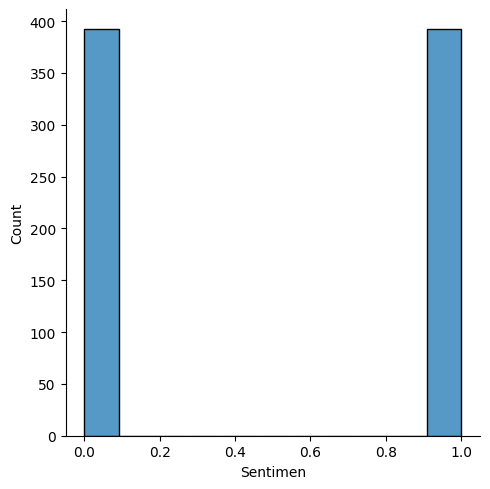

In [ ]:
import seaborn as sns
sns.displot(data=merged_data,x='Sentimen')

In [ ]:
import sklearn
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df2 = pd.DataFrame(X_resampled)
df2

,user,tweets
0,Ibu Sri,"..harus PUTUS SEKOLAH, gara-gara Permendibud i..."
1,Ibu Sri,"..mengenai KK bersyarat. Ini diskriminatif, dh..."
2,R Sunandar,"@__AnakKolong @Mdy_Asmara1701 , ada 85 juta le..."
3,BahtiaR🇮🇩🇸🇩,@_ekokuntadhi Ayo... Bully Mas Anies Baswedan ...
4,@Adhi_Putro,@_ekokuntadhi Klo Gk habiskn uang DKI bukan AN...
...,...,...
779,Dewi Hartati,@aniesmania @tatakujiyati @fktmb @KRMTRoySuryo...
780,Sastro,@salimafillah Sya dr orng nggk penting jg usul...
781,Samsul Ridwan,@Mdy_Asmara1701 Ternyata ada yg gelisah ketika...
782,RasaJingga,@Siswant72604487 @msaid_didu Saatnya kita satu...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,y_resampled, test_size=0.1, random_state=42)

In [ ]:
X_train

,user,tweets
265,Tomo,@msaid_didu Pasti Anies Baswedan...
54,RajaJara,@arifin34533 @SantorinisSun Anies cuma gubernu...
735,Anti Mukidi,@Sobat_Anies Untuk Indonesia bermartabat dan d...
514,Chaca,@Sobat_Anies Bnyk akun yg aq blokir terkait k...
97,Habib bamukming,@deditelaumbanu4 @aniesbaswedan Ha. Anies dite...
...,...,...
71,Dimas Seno 🇮🇩🇮🇩🇮🇩🇮🇩🇮🇩,@Belok_dong @aniesbaswedan Makin Mendekati Len...
106,Loudy Ed,@Dennysiregar7 Hahaha....si dendai mulai care ...
270,Yesmar Banu Kus,"@Muhamma15022310 @Mentimoen Seperti SBY dulu, ..."
435,Helmi Felis,Siapa CaWaPres yang pas untuk Anies Baswedan.....


In [ ]:
classifier = RandomForestClassifier(n_estimators = 40, random_state=100)
rfc=classifier.fit(X, y_train)
# Predicting the test set results
y_pred = classifier.predict(X_test)

ValueError: ignored